In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#!pip3 install torch===1.2.0 torchvision===0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!#pip install typeguard

In [ ]:
import random
seeds = random.sample(range(0, 10000), 10)
seeds

[7138, 9626, 7046, 436, 2707, 9999, 8453, 327, 6684, 1001]

In [ ]:
seeds = [7138, 962, 704634, 436, 27, 9999, 8453, 327, 6684, 1001]

In [ ]:
from fastai import *
from fastai.vision import *
import random
bs = 32
random.seed(7138)

In [ ]:
%cd orig

/content/drive/My Drive/orig


In [ ]:
#!unzip 'data-orig.zip'

In [ ]:
path_img = Path('data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


ImageDataBunch;

Train: LabelList (1180 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Valid: LabelList (398 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Test: None

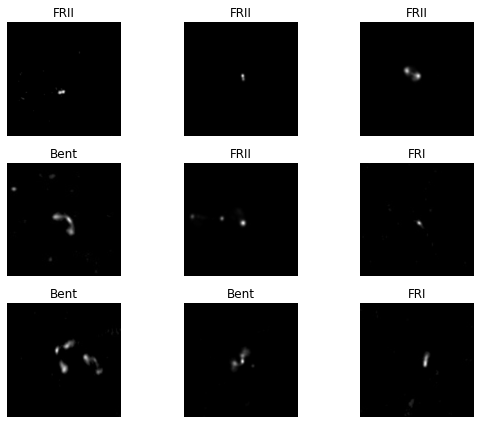

In [ ]:
data.show_batch(rows=3, figsize=(8,6))

In [ ]:
learn = cnn_learner(data, models.densenet161, metrics=accuracy)
learn.freeze()

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


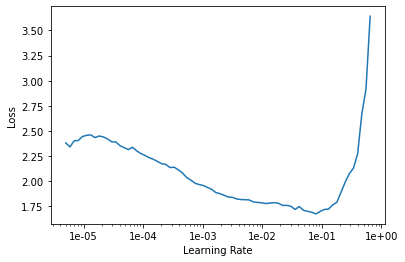

In [ ]:
# init 7138
learn.lr_find(start_lr=1e-6, end_lr=1e1, wd=5e-3)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.423748,1.277361,0.537688,01:15


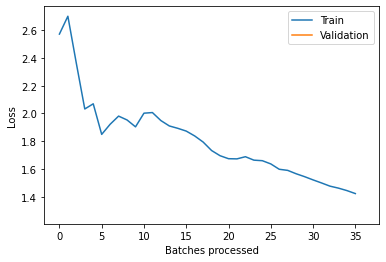

In [ ]:
# init 7138
learn.fit_one_cycle(1, max_lr=slice(1e-35,1e-2))
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


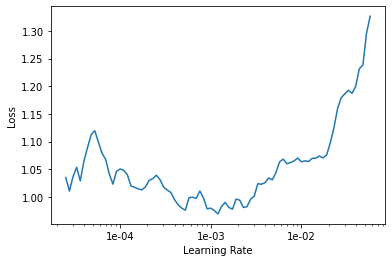

In [ ]:
# init 7138
learn.unfreeze()
learn.lr_find(start_lr=slice(1e-6, 1e-5), end_lr=slice(1e-2, 1e-1), wd=1e-3)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.053623,2.091074,0.268844,00:29
1,1.020280,1.487911,0.505025,00:30
2,1.014116,0.764293,0.733668,00:29


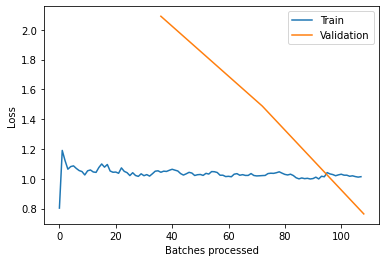

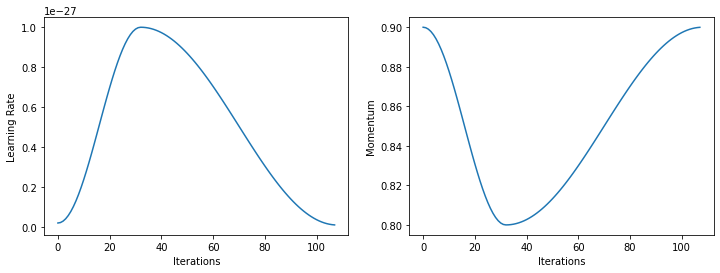

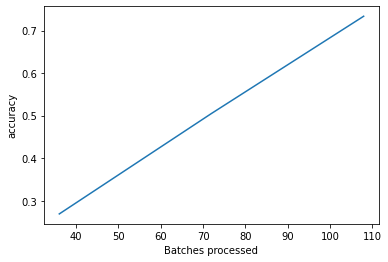

In [ ]:
# init 7138
learn.fit_one_cycle(3, max_lr=slice(1e-4, 1e-27), div_factor=50, final_div=100, wd=1e-4, moms=(0.9, 0.8))
learn.recorder.plot_losses()
# schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,0.957348,1.276759,0.552764,00:29
1,0.756004,0.652888,0.768844,00:30
2,0.642915,0.708443,0.809045,00:29
3,0.517937,0.523670,0.836683,00:29
4,0.436575,0.479693,0.836683,00:29
5,0.403374,0.420253,0.859297,00:29
6,0.381740,0.352849,0.889447,00:29
7,0.296103,0.274377,0.881910,00:29
8,0.232112,0.299892,0.899498,00:29
9,0.204920,0.245555,0.912060,00:29


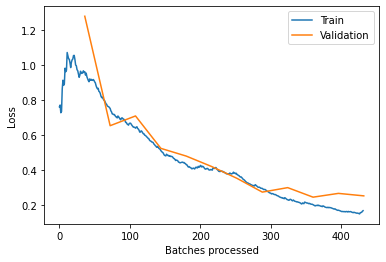

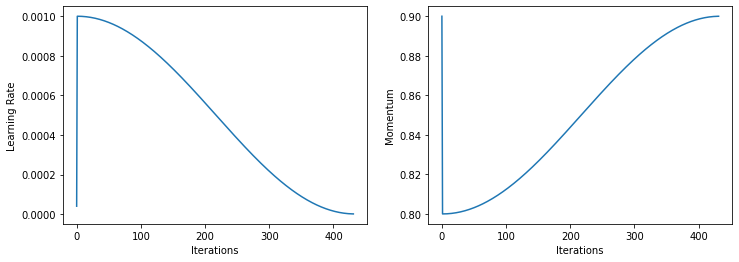

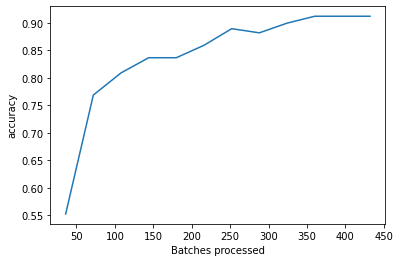

In [ ]:
# init 7138
learn.fit_one_cycle(cyc_len=12, max_lr=slice(1e-4, 1e-3), pct_start=0, final_div=1000, wd=1e-3, moms=(0.9, 0.8)) # warm restart: pct_start=0
#learn.save('stage-3')
learn.recorder.plot_losses()
# # schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [ ]:
learn.save('rg-init-7138')

In [ ]:
learn.load('rg-init-7138')
interp = ClassificationInterpretation.from_learner(learn)

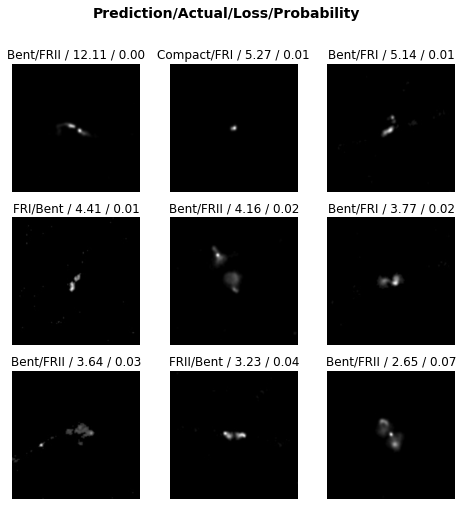

In [ ]:
interp.plot_top_losses(9, figsize=(8,8))

In [ ]:
losses, indexes = interp.top_losses(30)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data/valid/FRII/J151108.76+180153.2.jpeg') PosixPath('data/valid/FRI/J141104.33-030043.3.jpeg')
 PosixPath('data/valid/FRI/J143521.30-024051.7.jpg') PosixPath('data/valid/Bent/J143505.58-040920.9.jpg')
 PosixPath('data/valid/FRII/J144919.01+210548.0.jpg') PosixPath('data/valid/FRI/J143825.92-010001.5.jpg')
 PosixPath('data/valid/FRII/J153004.69+290009.3.jpg') PosixPath('data/valid/Bent/J080431.42+192212.9.jpg')
 PosixPath('data/valid/FRII/J145942.07+290334.1.jpg') PosixPath('data/valid/Bent/J143448.92-021509.4.jpg')
 PosixPath('data/valid/FRI/J140313.27+061008.2.jpeg') PosixPath('data/valid/Bent/J112501.69+091004.3.jpg')
 PosixPath('data/valid/FRI/J143410.56+013646.9.jpg') PosixPath('data/valid/FRI/J143848.86+004059.2.jpg')
 PosixPath('data/valid/FRI/J140310.68+393949.8.jpeg') PosixPath('data/valid/FRI/J140956.99-012104.7.jpeg')
 PosixPath('data/valid/FRI/J141138.22+495304.0.jpg') PosixPath('data/valid/Bent/J081545.53+371035.5.jpg')
 PosixPath('data/valid/FRI/J143136.97+522

In [ ]:
losses, indexes = interp.top_losses(30)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data/valid/FRII/J151108.76+180153.2.jpeg') PosixPath('data/valid/FRI/J141104.33-030043.3.jpeg')
 PosixPath('data/valid/FRI/J143521.30-024051.7.jpg') PosixPath('data/valid/Bent/J143505.58-040920.9.jpg')
 PosixPath('data/valid/FRII/J144919.01+210548.0.jpg') PosixPath('data/valid/FRI/J143825.92-010001.5.jpg')
 PosixPath('data/valid/FRII/J153004.69+290009.3.jpg') PosixPath('data/valid/Bent/J080431.42+192212.9.jpg')
 PosixPath('data/valid/FRII/J145942.07+290334.1.jpg') PosixPath('data/valid/Bent/J143448.92-021509.4.jpg')
 PosixPath('data/valid/FRI/J140313.27+061008.2.jpeg') PosixPath('data/valid/Bent/J112501.69+091004.3.jpg')
 PosixPath('data/valid/FRI/J143410.56+013646.9.jpg') PosixPath('data/valid/FRI/J143848.86+004059.2.jpg')
 PosixPath('data/valid/FRI/J140310.68+393949.8.jpeg') PosixPath('data/valid/FRI/J140956.99-012104.7.jpeg')
 PosixPath('data/valid/FRI/J141138.22+495304.0.jpg') PosixPath('data/valid/Bent/J081545.53+371035.5.jpg')
 PosixPath('data/valid/FRI/J143136.97+522

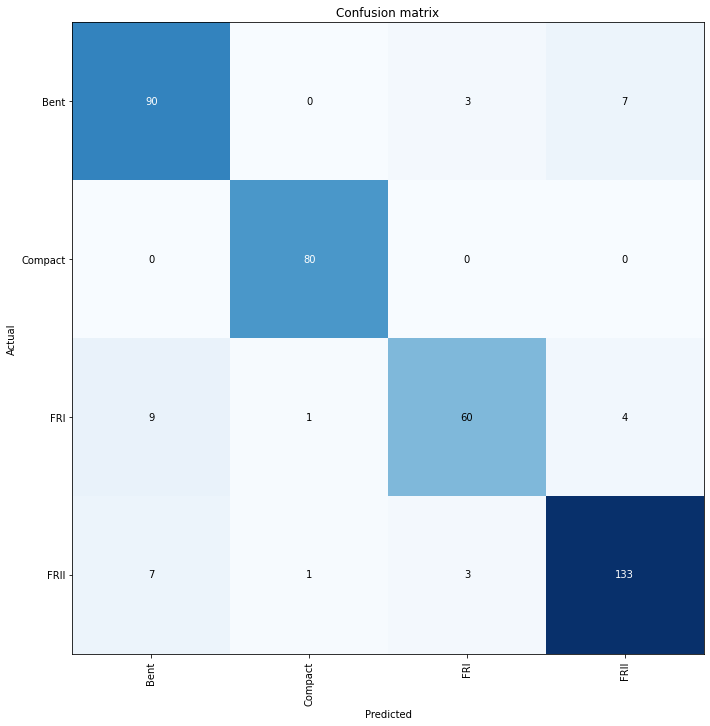

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
path_img = Path('data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1180 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Valid: LabelList (404 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Compact,Compact,Compact,Compact,Compact
Path: data;

Test: None

In [ ]:
learn = cnn_learner(data, models.densenet161, metrics=[accuracy])


In [ ]:
learn = learn.load('rg-init-7138')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

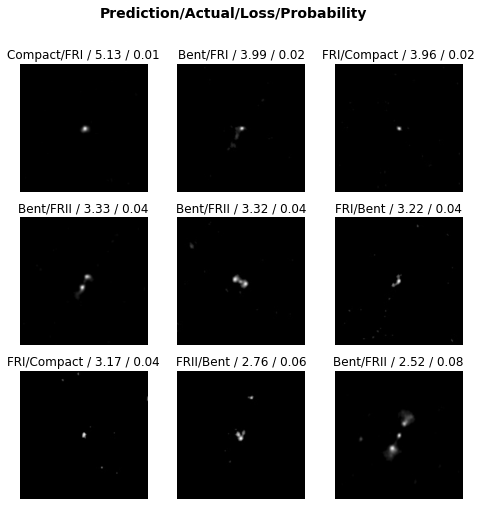

In [ ]:
interp.plot_top_losses(9, figsize=(8,8))

In [ ]:
losses, indexes = interp.top_losses(36)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data/test/FRI/J081207.59+103245.7.jpeg') PosixPath('data/test/FRI/J083140.32+125805.1.jpeg')
 PosixPath('data/test/Compact/J085732.64+304610.5.jpeg') PosixPath('data/test/FRII/J081303.31+132606.7.jpeg')
 PosixPath('data/test/FRII/J083754.15+154326.9.jpeg') PosixPath('data/test/Bent/J091944.25+043018.4.jpeg')
 PosixPath('data/test/Compact/J005830.07-011138.7.jpeg') PosixPath('data/test/Bent/J083841.50+444824.1.jpeg')
 PosixPath('data/test/FRII/J004312.83-103956.1.jpeg') PosixPath('data/test/Bent/J114525.98-022332.9.jpeg')
 PosixPath('data/test/Bent/J102902.08+494417.5.jpeg') PosixPath('data/test/FRI/J085401.08+401343.0.jpeg')
 PosixPath('data/test/FRI/J085101.94+080050.6.jpeg') PosixPath('data/test/Compact/J085457.38+562317.9.jpeg')
 PosixPath('data/test/Bent/J095346.96+121530.0.jpeg') PosixPath('data/test/Compact/J005901.17+002530.9.jpeg')
 PosixPath('data/test/FRII/J092508.58+310341.5.jpeg') PosixPath('data/test/Bent/J024558.53-064900.7.jpeg')
 PosixPath('data/test/Bent/J1

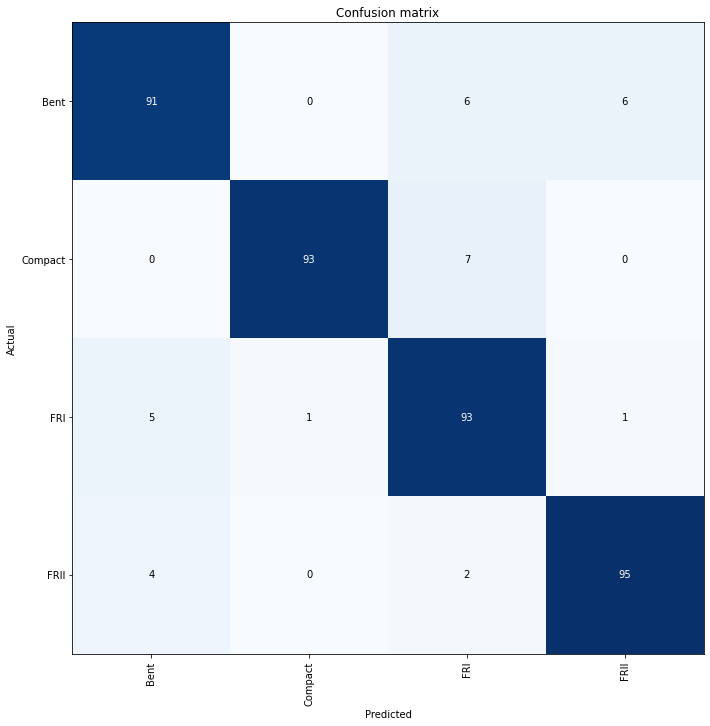

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
import glob

image_list = glob.glob('data/test/*/*')

Bent = 0
Pred_Bent=0
Compact=0
Pred_Compact=0
FRI=0
Pred_FRI=0
FRII=0
Pred_FRII = 0 

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    rg_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if rg_class == 'Bent':
        Bent += 1
        if pred_class == 'Bent':
            Pred_Bent += 1
            print(each[2:], pred_class)
        # else:
        #     print(each[2:], pred_class)
    elif rg_class == 'Compact':
        Compact += 1
        if pred_class == 'Compact':
            Pred_Compact += 1
            print(each[2:], pred_class)
        # else:
        #    print(each[2:], pred_class)
    elif rg_class == 'FRI':
        FRI += 1
        if pred_class == 'FRI':
            Pred_FRI += 1
            print(each[2:], pred_class)
        # else:
        #     print(each[2:], pred_class)
    elif rg_class == 'FRII':
        FRII += 1
        if pred_class == 'FRII':
            Pred_FRII += 1
            print(each[2:], pred_class)
        # else:
        #    print(each[2:], pred_class)

['Compact', 'J000325.23+004355.5.jpeg'] Compact
['Compact', 'J000140.36-010636.9.jpeg'] Compact
['Compact', 'J000140.21+010531.1.jpeg'] Compact
['Compact', 'J000400.88+001717.9.jpeg'] Compact
['Compact', 'J000027.89-010235.4.jpeg'] Compact
['Compact', 'J000001.58-092940.3.jpeg'] Compact
['Compact', 'J001503.37+003459.2.jpeg'] Compact
['Compact', 'J002142.25-090044.4.jpeg'] Compact
['Compact', 'J002722.71-104759.2.jpeg'] Compact
['Compact', 'J002833.42+005510.9.jpeg'] Compact
['Compact', 'J002235.86+003555.0.jpeg'] Compact
['Compact', 'J002331.60+010116.7.jpeg'] Compact
['Compact', 'J002351.21+000632.9.jpeg'] Compact
['Compact', 'J001511.48-011153.1.jpeg'] Compact
['Compact', 'J002306.96+010236.8.jpeg'] Compact
['Compact', 'J003055.39+001024.2.jpeg'] Compact
['Compact', 'J003230.91+002440.2.jpeg'] Compact
['Compact', 'J005805.37+002647.4.jpeg'] Compact
['Compact', 'J015152.78-100050.5.jpeg'] Compact
['Compact', 'J004625.17+003118.4.jpeg'] Compact
['Compact', 'J015301.50-010841.5.jpeg'] 

In [ ]:
print('TP Bent: ' + str(Pred_Bent) + '/' + str(Bent))
print('TP Compact: ' + str(Pred_Compact) + '/' + str(Compact))
print('TP FRI: ' + str(Pred_FRI) + '/' + str(FRI) )
print('TP FRII: ' + str(Pred_FRII) + '/' + str(FRII) )

TP Bent: 91/103
TP Compact: 93/100
TP FRI: 93/100
TP FRII: 95/101


In [ ]:
learn = cnn_learner(data, models.densenet161, metrics=accuracy)
learn.freeze()